<a href="https://colab.research.google.com/github/dhruvjha206/Mech-Prop-using-ML/blob/main/Al6061_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

**Data Preparation**

About the Data Set:

The dataset is stress-strain of Aluminium 6061 alloy under uniaxial steady-state tension at different temperature.

In [ ]:
#uploading local files
from google.colab import files
uploaded = files.upload()

Saving Al6061_100.csv to Al6061_100 (1).csv


In [ ]:
#reading csv
import io
data = pd.read_csv(io.BytesIO(uploaded['Al6061_100.csv']), encoding= 'unicode_escape')
print(data.shape)

(625, 5)


Dataset:

In [ ]:
data

,Strain,Stress_MPa
0,-0.000018,0.460338
1,-0.000025,0.893298
2,-0.000046,1.407751
3,-0.000061,1.965058
4,-0.000095,2.850505
...,...,...
619,0.114303,219.380867
620,0.114715,217.522198
621,0.114914,216.639858
622,0.115126,215.746640


Prelimnary data analysis:

In [ ]:
data.isnull().sum()

Alloy_Name       0
Temp (°C)        0
Strain           0
Stress_MPa       0
Specimen_Type    0
dtype: int64

In [ ]:
data = data[data['Stress_MPa'] != 0]
data

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type
0,Al6061,100,-0.000018,0.460338,Uniaxial tension
1,Al6061,100,-0.000025,0.893298,Uniaxial tension
2,Al6061,100,-0.000046,1.407751,Uniaxial tension
3,Al6061,100,-0.000061,1.965058,Uniaxial tension
4,Al6061,100,-0.000095,2.850505,Uniaxial tension
...,...,...,...,...,...
619,Al6061,100,0.114303,219.380867,Uniaxial tension
620,Al6061,100,0.114715,217.522198,Uniaxial tension
621,Al6061,100,0.114914,216.639858,Uniaxial tension
622,Al6061,100,0.115126,215.746640,Uniaxial tension


Exploratory data analysis:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alloy_Name     624 non-null    object 
 1   Temp (°C)      624 non-null    int64  
 2   Strain         624 non-null    float64
 3   Stress_MPa     624 non-null    float64
 4   Specimen_Type  624 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 29.2+ KB


In [ ]:
data.describe()

,Temp (°C),Strain,Stress_MPa
count,624.0,624.000000,624.000000
mean,100.0,0.044285,228.744961
std,0.0,0.035598,65.444217
min,100.0,-0.000423,0.460338
25%,100.0,0.009400,239.654276
50%,100.0,0.039520,257.137393
75%,100.0,0.073683,262.946678
max,100.0,0.115346,264.757090


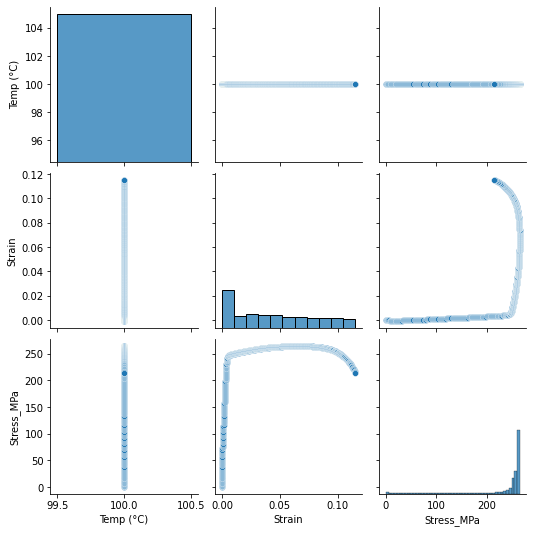

In [ ]:
sn.pairplot(data=data)

Data Visualisation (stress-strain curve):

In [ ]:
X = data['Strain'].values
Y = data['Stress_MPa'].values

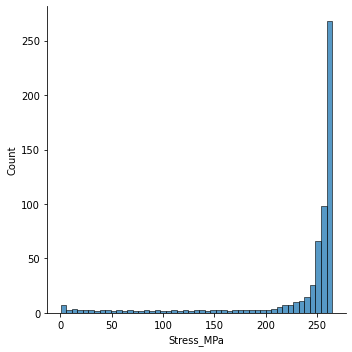

In [ ]:
sn.displot(data, x = "Stress_MPa")

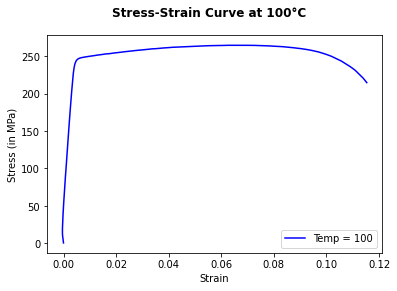

In [ ]:
plt.plot(X, Y, color='b', label='Temp = 100')
plt.xlabel('Strain')
plt.ylabel('Stress (in MPa)')
plt.suptitle("""Stress-Strain Curve at 100\N{DEGREE SIGN}C\n""", fontweight ="bold")
plt.legend()
plt.show()

**PROPORTIONAL LIMIT**: To find proportional limit we need to find the linear regression line with minimum 95% accuracy *(Using linear regression algorithm)*

In [ ]:
#finding multiple regression line and plotting the line with highest accuracy
m = len(X)
a = np.zeros(m)
c = np.zeros(m)
r2 = np.zeros(m)

for i in range(50,m):
  mean_x = 0
  mean_y = 0
  for j in range(i):
    mean_x += X[j]
    mean_y += Y[j]
  mean_x = mean_x/i
  mean_y = mean_y/i
  num = 0
  den = 0
  for j in range(i):
    num += (X[j]-mean_x)*(Y[j]-mean_y)
    den += (X[j]-mean_x)**2
  a[i] = num/den
  c[i] = mean_y-(a[i]*mean_x)

  ss_d = np.zeros(m)
  ss_n = np.zeros(m)

  for j in range(i):
    predict_y = c[i]+a[i]*X[j]
    ss_d[i] += (Y[j]-mean_y)**2
    ss_n[i] += (Y[j]-predict_y)**2
  r2[i] = 1-(ss_n[i]/ss_d[i])
  
  i_max = np.argmax(r2)
  r2_final = np.max(r2)
  a_final = a[i_max]
  c_final = c[i_max]
print(a_final,c_final,r2_final)

52139.7880329209 42.60279283861331 0.9772272244880037


In [ ]:
import random
prop_lim = random.randint(0,m)

for i in range(50,m):
  if(r2[i]>=0.95):
    prop_lim = i
print(prop_lim)
x2 = X[prop_lim]
y2 = Y[prop_lim]
print(y2)

141
247.3597401


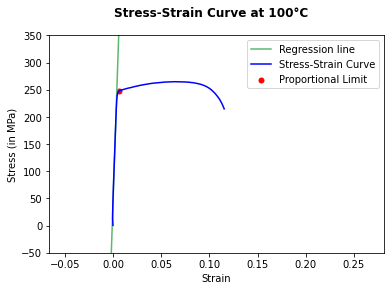

In [ ]:
max_x = np.max(X)+0.15
min_x = np.min(X)-0.05

x = np.linspace(min_x,max_x)
y = c_final+a_final*x
plt.ylim(-50, 350)

plt.plot(x, y, color='#58b970', label='Regression line')
plt.plot(X, Y, color='b', label='Stress-Strain Curve')
plt.scatter(x2,y2,color='r',marker='.',s=100, label = 'Proportional Limit')
plt.xlabel('Strain')
plt.ylabel('Stress (in MPa)')
plt.suptitle("""Stress-Strain Curve at 100\N{DEGREE SIGN}C\n""", fontweight ="bold")
plt.legend()
plt.show()

**Yeild Point:** To find yeild point we take an offset of 0.2% in strain and find the linear regression line with minimum 95% accuracy with the offset data (Using linear regression algorithm)

In [ ]:
data["Offset Strain"] = data["Strain"] + 0.002
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type,Offset Strain
0,Al6061,100,-0.000018,0.460338,Uniaxial tension,0.001982
1,Al6061,100,-0.000025,0.893298,Uniaxial tension,0.001975
2,Al6061,100,-0.000046,1.407751,Uniaxial tension,0.001954
3,Al6061,100,-0.000061,1.965058,Uniaxial tension,0.001939
4,Al6061,100,-0.000095,2.850505,Uniaxial tension,0.001904
...,...,...,...,...,...,...
619,Al6061,100,0.114303,219.380867,Uniaxial tension,0.116303
620,Al6061,100,0.114715,217.522198,Uniaxial tension,0.116715
621,Al6061,100,0.114914,216.639858,Uniaxial tension,0.116914
622,Al6061,100,0.115126,215.746640,Uniaxial tension,0.117126


In [ ]:
XX = data['Offset Strain'].values
YY = data['Stress_MPa'].values

In [ ]:
mm = len(X)
a1 = np.zeros(mm)
c1 = np.zeros(mm)
r2_1 = np.zeros(mm)

for i in range(50,mm):
  mean_xx = 0
  mean_yy = 0
  for j in range(i):
    mean_xx += XX[j]
    mean_yy += YY[j]
  mean_xx = mean_xx/i
  mean_yy = mean_yy/i
  num_1 = 0
  den_1 = 0
  for j in range(i):
    num_1 += (XX[j]-mean_xx)*(YY[j]-mean_yy)
    den_1 += (XX[j]-mean_xx)**2
  a1[i] = num_1/den_1
  c1[i] = mean_yy-(a1[i]*mean_xx)

  ss_d1 = np.zeros(mm)
  ss_n1 = np.zeros(mm)

  for j in range(i):
    predict_yy = c1[i]+a1[i]*XX[j]
    ss_d1[i] += (Y[j]-mean_yy)**2
    ss_n1[i] += (Y[j]-predict_yy)**2
  r2_1[i] = 1-(ss_n1[i]/ss_d1[i])
  
  i_max1 = np.argmax(r2_1)
  r2_1_final = np.max(r2_1)
  a1_final = a1[i_max]
  c1_final = c1[i_max]
print(a1_final,c1_final,r2_1_final)

52139.788032920886 -61.67678322722837 0.9772272244880037


In [ ]:
for i in range (50, mm):
  if(data.iloc[prop_lim]['Offset Strain'] <= data.iloc[i]['Strain']) :
    x3 = data.loc[i].Strain
    y3 = data.loc[i].Stress_MPa
    break
print(y3)

249.10772180000004


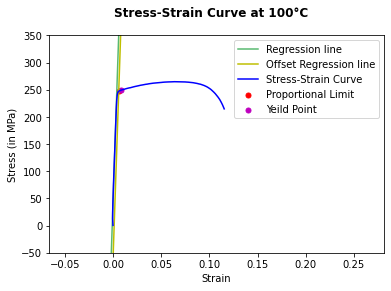

In [ ]:
max_x = np.max(X)+0.15
min_x = np.min(X)-0.05

max_xx = np.max(X)+0.15
min_xx = np.min(X)-0.05

x = np.linspace(min_x,max_x)
y = c_final+a_final*x

xx = np.linspace(min_xx,max_xx)
yy = c1_final+a1_final*xx
plt.ylim(-50, 350)

plt.plot(x, y, color='#58b970', label='Regression line')
plt.plot(xx, yy, color='y', label='Offset Regression line')
plt.plot(X, Y, color='b', label='Stress-Strain Curve')
plt.scatter(x2,y2,color='r',marker='.',s=100, label = 'Proportional Limit')
plt.scatter(x3,y3,color='m',marker='.',s=100, label = 'Yeild Point')
plt.xlabel('Strain')
plt.ylabel('Stress (in MPa)')
plt.suptitle("""Stress-Strain Curve at 100\N{DEGREE SIGN}C\n""", fontweight ="bold")
plt.legend()
plt.show()

**Ultimate Tensile Strength:** The maximum stress in stress-strain curve is UTS.

In [ ]:
max_stress = data.iloc[data['Stress_MPa'].idxmax()]
x4 = max_stress['Strain']
y4 = max_stress['Stress_MPa']
print(y4)

264.7570897


**Fracture Point:** The last value of stress before the rod breaks is FP.

In [ ]:
x5 = X[m-1]
y5 = Y[m-1]
print(y5)

214.7530254


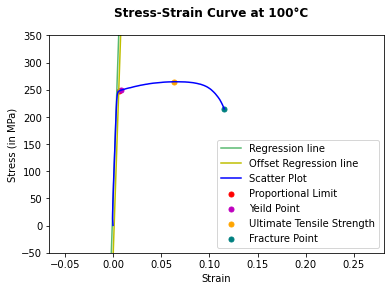

Proportional limit : 247.3597401 MPa
Yield Strength : 249.10772180000004 MPa
Ultimate tensile strength : 264.7570897 MPa
Proportional limit : 214.7530254 MPa


In [ ]:
plt.ylim(-50, 350)

plt.plot(x, y, color='#58b970', label='Regression line')
plt.plot(xx, yy, color='y', label='Offset Regression line')
plt.plot(X, Y, color='b', label='Scatter Plot')
plt.scatter(x2,y2,color='r',marker='.',s=100, label = 'Proportional Limit')
plt.scatter(x3,y3,color='m',marker='.',s=100, label = 'Yeild Point')
plt.scatter(x4,y4,color='orange',marker='.',s=100, label = 'Ultimate Tensile Strength')
plt.scatter(x5,y5,color='teal',marker='.',s=100, label = 'Fracture Point')
plt.xlabel('Strain')
plt.ylabel('Stress (in MPa)')
plt.suptitle("""Stress-Strain Curve at 100\N{DEGREE SIGN}C\n""", fontweight ="bold")
plt.legend()
plt.show()

print('Proportional limit :' ,y2 ,'MPa')
print('Yield Strength :' ,y3 ,'MPa')
print('Ultimate tensile strength :' , y4 ,'MPa')
print('Proportional limit :' ,y5 ,'MPa')

**Model Accuracy:**

In [ ]:
print('The acuuracy for this model is ''%0.2f'%(r2_final*100),"%")

The acuuracy for this model is 97.72 %
